# Matrices in numpy

We're going to be dealing with matrices quite a bit in this section, so let's have a review of how numpy handles matrices.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Matrices are 2D arrays in numpy
# A[i][j] = ith row and jth column
A = np.random.rand(12).reshape(4,3)
print(A)
print(A[1])
print(A[1][2])
print(A[1,2])

[[0.57487069 0.9823841  0.09112579]
 [0.85884055 0.89054154 0.77408934]
 [0.786177   0.65692552 0.72699611]
 [0.66648673 0.92769796 0.33097987]]
[0.85884055 0.89054154 0.77408934]
0.7740893379034613
0.7740893379034613


In [3]:
# Can also use np.transpose(A)  or  A.T
A.transpose()

array([[0.57487069, 0.85884055, 0.786177  , 0.66648673],
       [0.9823841 , 0.89054154, 0.65692552, 0.92769796],
       [0.09112579, 0.77408934, 0.72699611, 0.33097987]])

In [4]:
# Matrix multiplication uses the @ operator
y = np.array((1,2,3))
A@y

array([2.81301628, 4.96219165, 4.28101637, 3.51482228])

In [5]:
# Diagonal matrix
np.diag((1,2,3,4))

array([[1, 0, 0, 0],
       [0, 2, 0, 0],
       [0, 0, 3, 0],
       [0, 0, 0, 4]])

In [6]:
# Inverse
np.linalg.inv((np.diag((1,2,3,4))))

array([[1.        , 0.        , 0.        , 0.        ],
       [0.        , 0.5       , 0.        , 0.        ],
       [0.        , 0.        , 0.33333333, 0.        ],
       [0.        , 0.        , 0.        , 0.25      ]])

In [7]:
A = np.random.rand(4).reshape(2,2)
B = np.linalg.inv(A)
B@A

array([[ 1.00000000e+00, -6.01445136e-16],
       [-6.60539330e-16,  1.00000000e+00]])

In [8]:
# Determinant
print(np.linalg.det(A))
print(A[0,0]*A[1,1] - A[0,1]*A[1,0])

-0.10191999972462222
-0.10191999972462229


In [9]:
# should be 1 * 2 * 3 * 4 = 24
np.linalg.det(np.diag((1,2,3,4)))

23.999999999999993

# Matrix decompositions

In [10]:
# We need scipy.linalg for eigenvalues
import scipy.linalg

# Visualize matrices as a color map
def plot_matrices(A,titles=[]):
    plt.clf()
    n = len(A)
    if titles==[]:
        titles = [""]*n
    plt.figure(figsize=(n*4,4))
    for i,AA in enumerate(A):
        plt.subplot(1, n, i+1)
        plt.imshow(AA)
        plt.colorbar()
        plt.title(titles[i])
    plt.show()

## LU decomposition

<Figure size 640x480 with 0 Axes>

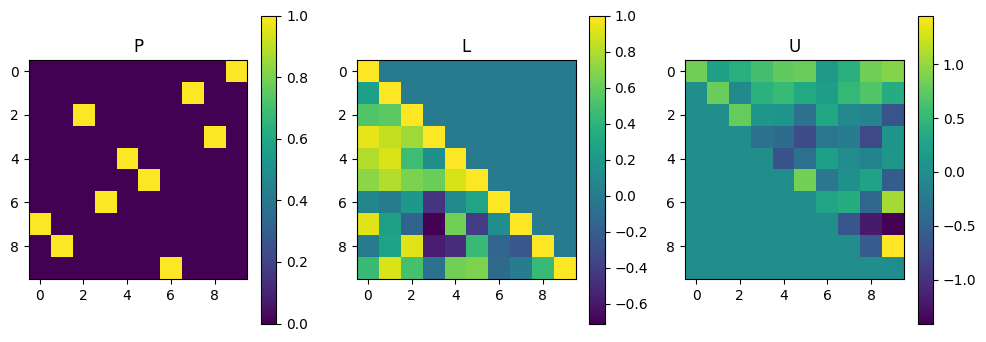

<Figure size 640x480 with 0 Axes>

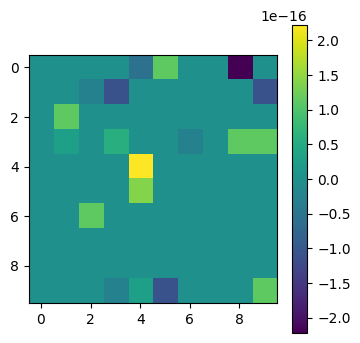

In [11]:
A = np.random.rand(100).reshape(10,10)
P, L, U = scipy.linalg.lu(A)
plot_matrices([P, L, U], titles=["P", "L", "U"])
plot_matrices([P@L@U - A])

## Eigen-decomposition

The eigenvectors of an $n\times n$ matrix $\mathbf{A}$ satisfy

$$\mathbf{A}\mathbf{v_i} = \lambda_i \mathbf{v_i}$$

with eigenvalues $\lambda_i$. Now consider the matrix $Q$ whose columns correspond to the $n$ eigenvectors $\mathbf{v_i}$: you can easily show that this satisfies

$$\mathbf{A}\mathbf{Q} = \mathbf{Q}\mathbf{\Lambda},$$

where $\mathbf{\Lambda} = \mathrm{diag}(\lambda_1, \lambda_2\dots \lambda_n)$.

Therefore 

$$\mathbf{A} = \mathbf{Q}\mathbf{\Lambda}\mathbf{Q^{-1}}$$

which is the *eigendecomposition* of the matrix.

Since $(\mathbf{A}\mathbf{B}\mathbf{C})^{-1} =\mathbf{C}^{-1}\mathbf{B}^{-1}\mathbf{A}^{-1}$, the inverse of the matrix is

$$\mathbf{A^{-1}} = \mathbf{Q}\mathbf{\Lambda}^{-1}\mathbf{Q^{-1}}$$

where 

$$\mathbf{\Lambda}^{-1} = \mathrm{diag}(1/\lambda_1, 1/\lambda_2\dots 1/\lambda_n).$$


In [12]:
# real symmetric matrix
n = 10
A = np.random.rand(n*n).reshape(n,n)
A = 0.5*(A + A.T)
A = A + np.diag(np.arange(n))
lam, Q = scipy.linalg.eig(A)
lam = np.real(lam)
Q = np.real(Q)

print("Eigenvalues=", lam)

print("Eigenvector check:")
for i in range(n):
    # The eigenvectors are given by the columns of Q, ie. Q[:,i]
    print(i, np.max(np.abs(A@Q[:,i]-lam[i]*Q[:,i])))

Eigenvalues= [11.57481875  0.11814652  8.81628573  1.38184428  2.236823    3.37700902
  7.11855695  6.48539964  5.20294079  4.33568771]
Eigenvector check:
0 1.0436096431476471e-14
1 8.259872278336411e-15
2 5.440092820663267e-15
3 2.345346139520643e-15
4 4.6629367034256575e-15
5 3.3306690738754696e-15
6 2.6645352591003757e-15
7 5.218048215738236e-15
8 5.329070518200751e-15
9 1.7763568394002505e-15


<Figure size 640x480 with 0 Axes>

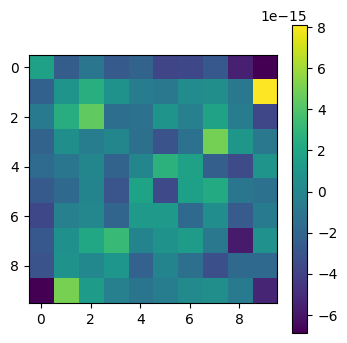

<Figure size 640x480 with 0 Axes>

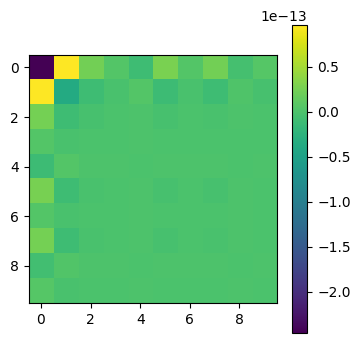

In [13]:
# Check eigendecomposition
plot_matrices([Q@np.diag(lam)@np.linalg.inv(Q) - A])

# and the inverse
plot_matrices([Q@np.diag(1/lam)@np.linalg.inv(Q) - np.linalg.inv(A)])

<Figure size 640x480 with 0 Axes>

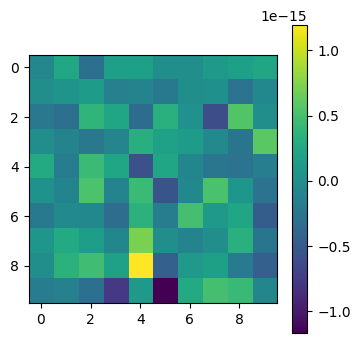

In [14]:
plot_matrices([np.linalg.inv(Q) - Q.T])

## Singular value decomposition (SVD)

The singular value decomposition (SVD) of a $m\times n$ matrix $\mathbf{A}$ is

$$\mathbf{A} = \mathbf{U}\ \mathbf{S}\ \mathbf{V^T},$$

where 

- $\mathbf{U}$ is an $m\times n$ matrix with orthonormal columns
- $\mathbf{S}$ is an $n\times n$ diagonal matrix whose diagonal elements are the **singular values** of the matrix $s_i$
- $\mathbf{V}$ is an $n\times n$ orthogonal matrix ($V^TV = VV^T = 1$)

If we have a square matrix ($m=n$), we can write the inverse as

$$\mathbf{A^{-1}} = \mathbf{V}\,\mathbf{diag}(1/s_i)\,\mathbf{U^T}$$

Singular values are:  [1.76883682 0.58748002 0.34937691]


<Figure size 640x480 with 0 Axes>

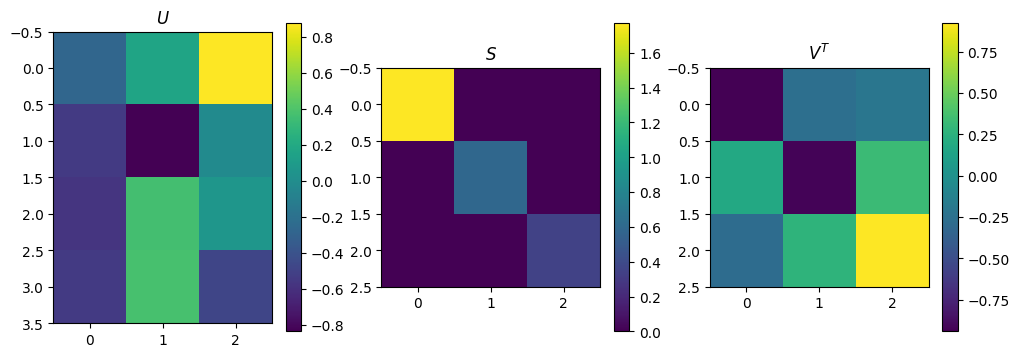

<Figure size 640x480 with 0 Axes>

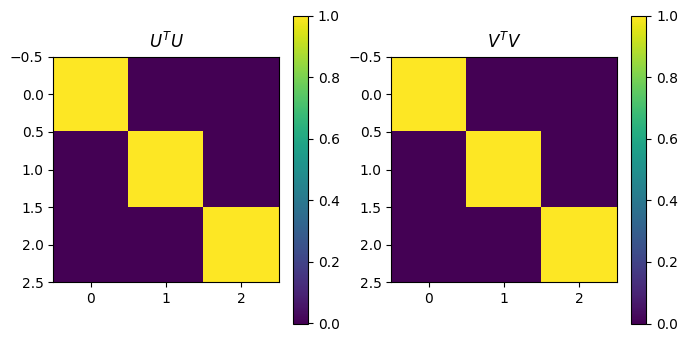

<Figure size 640x480 with 0 Axes>

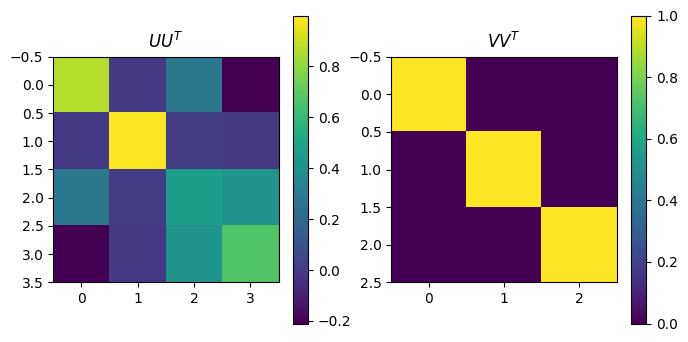

<Figure size 640x480 with 0 Axes>

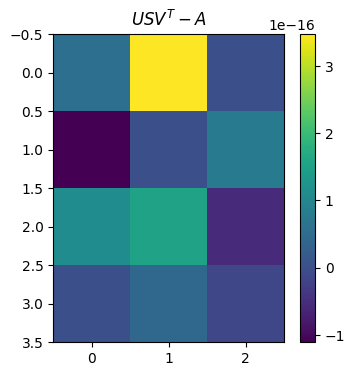

In [22]:
m=4; n=3

A = np.random.rand(m*n).reshape(m,n)

U, Sdiag, VT = np.linalg.svd(A, full_matrices=False)
print("Singular values are: ", Sdiag)

S = np.diag(Sdiag)
plot_matrices([U, S, VT], titles=[r"$U$", r"$S$", r"$V^T$"])

# U and V should be orthogonal
plot_matrices([U.transpose()@U,VT@VT.transpose()], titles=[r"$U^TU$",r"$V^TV$"])
plot_matrices([U@U.transpose(),VT.transpose()@VT], titles=[r"$UU^T$",r"$VV^T$"])

# Check the reconstructed matrix
plot_matrices([U@S@VT - A], titles=[r"$USV^T - A$"])